In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
col = ['survived', 'pclass', 'sex', 'age', 'alone', 'parch', 'fare', 'embark_town', 'deck']
titanic = df[col].copy()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   alone        891 non-null    bool    
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embark_town  889 non-null    object  
 8   deck         203 non-null    category
dtypes: bool(1), category(1), float64(2), int64(3), object(2)
memory usage: 50.9+ KB


Find the Missing values

In [14]:
# Display whether the dataset contains the NaN data
titanic.isnull()

,survived,pclass,sex,age,alone,parch,fare,embark_town,deck
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,True
889,False,False,False,False,False,False,False,False,False


In [15]:
# count the number of NaN (empty) values in the dataset
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
alone            0
parch            0
fare             0
embark_town      2
deck           688
dtype: int64

For Machine Learning, if a column contains more than 50% of NaN data, it should be dropped

In [16]:
titanic['age']>25

0      False
1       True
2       True
3       True
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: age, Length: 891, dtype: bool

<Axes: xlabel='sex'>

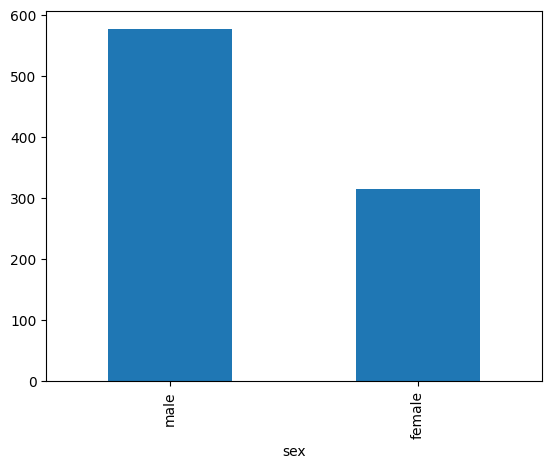

In [33]:
# Plotting the graph
titanic['sex'].value_counts().plot(kind='bar')

handle missing data
* numeric data type : Mean
* categorical data type : Mode

In [21]:
# Count the frequency of categorical data (column: Parent/Children, or parch)
titanic['parch'].value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: ylabel='count'>

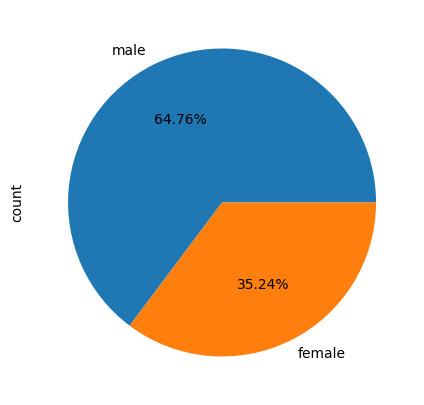

In [25]:
# Plotting the data fo sex
df['sex'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%.2f%%')
# kind: defines the type of chart to be plotted
# figsize: defines the width, height of the chart
# autopct: defines the automatic determination of percentage of the data representation
# '%.2f%%' represents displaying decimal values upto 2 decimal places alongwith the % symbol

In [28]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

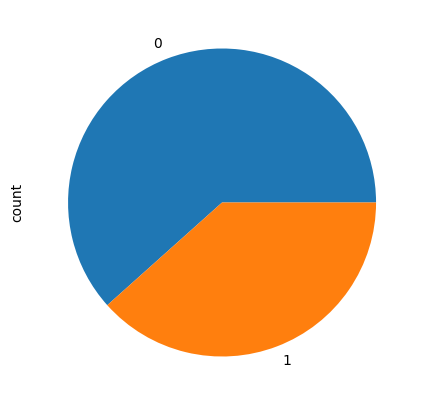

In [27]:
titanic['survived'].value_counts().plot(kind='pie', figsize=(5,5))